In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# We should not use "dropna"  now as it removes 6982 + rows 
# Instead it is Better to remove Columns "last_review" and "reviews_per_month "

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Train.csv',encoding="ISO-8859-1")

#country = pd.read_excel('Country-Code.xlsx')
#country.head()
df1.shape
df1.isnull().sum()


id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

In [6]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Null values in Column "name" = 12
# Null values in Column "host_name" =13

In [7]:
df1['name'].isnull().sum()


12

In [8]:
df1['host_name'].isnull().sum()

13

# Price distribution (Actual data set)

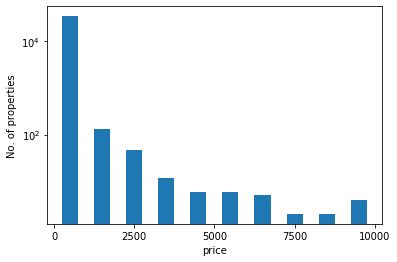

In [9]:
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (15,10)
plt.yscale('log')
plt.hist(df1.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

## Room Types according to Neighbourhood Groups

<Figure size 2160x1440 with 0 Axes>

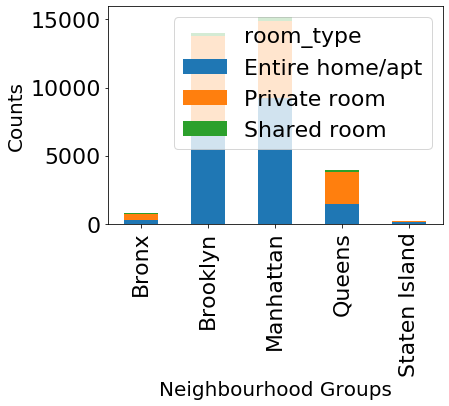

In [14]:

plt.figure(figsize = (30,20))
df1.groupby(['neighbourhood_group','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel("Neighbourhood Groups", size = 20)
plt.ylabel("Counts", size = 20)

plt.show()

# Price distribution (price<4000)

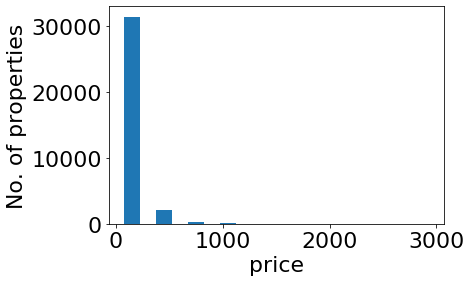

In [15]:
df2 = df1[df1.price<3000]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()


# Price distribution (price<500)
# Majority of the properties (about 1/3 rd) are priced around 100 dollars
# only 892 properties cost more than 500 dollars

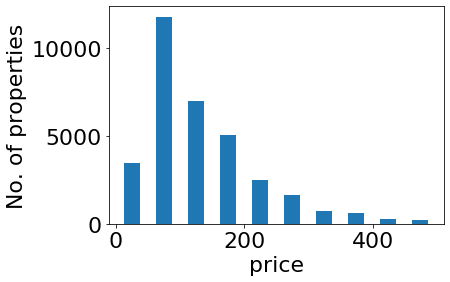

In [16]:
df2 = df1[df1.price < 500]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

In [17]:
df1.shape

(34226, 16)

In [18]:
df2.shape

(33334, 16)

In [19]:
df2 = df1[df1.price>=500]
df2.shape

(892, 16)

# Distribution of room types (not working, kernal hangs!!!)

In [20]:
#plt.hist(df1.room_type,rwidth=0.5)
#plt.xlabel('Room_Type')
#plt.ylabel('No. of properties')
#plt.rcParams.update({'font.size': 22})
#plt.show()

# Finding total no of host_names

In [21]:
df1['host_name'].value_counts()

Michael         291
David           290
Sonder (NYC)    229
John            208
Alex            199
               ... 
Manny Lucas       1
Anne-Sophie       1
Belgin            1
Sherrilyn         1
Naief             1
Name: host_name, Length: 9290, dtype: int64

# Total neighbourhood_groups

In [22]:
df1['neighbourhood_group'].value_counts()

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

#  Popular neighbourhoods

In [23]:
df1.groupby('neighbourhood_group')['neighbourhood'].value_counts()
df1.pivot_table(index=['neighbourhood_group', 'neighbourhood'], values = 'id',aggfunc='count').sort_values('id',ascending=False)

id
neighbourhood_group neighbourhood                   
Brooklyn            Williamsburg                2756
                    Bedford-Stuyvesant          2577
Manhattan           Harlem                      1877
Brooklyn            Bushwick                    1719
Manhattan           Upper West Side             1403
...                                              ...
Staten Island       Rossville                      1
                    Bay Terrace, Staten Island     1
                    Lighthouse Hill                1
                    Huguenot                       1
Bronx               Spuyten Duyvil                 1

[217 rows x 1 columns]

Finding average price of each neighbourhood group

In [24]:
s_grouped = df1.groupby(['neighbourhood_group', 'room_type'])['price']
s_grouped.mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.455224
                     Private room        67.337691
                     Shared room         63.550000
Brooklyn             Entire home/apt    181.116525
                     Private room        76.117872
                     Shared room         52.257353
Manhattan            Entire home/apt    249.621554
                     Private room       117.323456
                     Shared room         88.429412
Queens               Entire home/apt    148.470746
                     Private room        68.716412
                     Shared room         73.767123
Staten Island        Entire home/apt    187.964286
                     Private room        61.198473
                     Shared room         63.400000
Name: price, dtype: float64

Finding average price of each neighbourhood

In [25]:
ng_grouped = df1.groupby(['neighbourhood_group', 'neighbourhood','room_type'])['price']
ng = ng_grouped.median()
ng

neighbourhood_group  neighbourhood  room_type      
Bronx                Allerton       Entire home/apt     90.0
                                    Private room        49.5
                     Baychester     Entire home/apt     95.0
                                    Private room        60.0
                     Belmont        Entire home/apt    273.0
                                                       ...  
Staten Island        Tottenville    Private room       110.0
                     West Brighton  Entire home/apt     99.0
                                    Private room        52.0
                     Westerleigh    Entire home/apt    103.0
                                    Private room        40.0
Name: price, Length: 518, dtype: float64

# Finding average price of top host "Michael" by 'room_type'

In [26]:
df2 = df1[ df1['host_name']=='Michael']
df2.groupby('room_type')['price'].mean()

room_type
Entire home/apt    195.715909
Private room        81.266667
Shared room         72.100000
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' 'neighbourhood_group'

In [27]:
df2.groupby('neighbourhood_group')['price'].mean()


neighbourhood_group
Bronx            111.666667
Brooklyn         114.818966
Manhattan        184.201389
Queens           131.560000
Staten Island     77.333333
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' neighbourhood'

In [28]:
df2.groupby('neighbourhood')['price'].mean()

neighbourhood
Arverne                      300.000000
Astoria                       98.000000
Bay Ridge                    135.000000
Bedford-Stuyvesant            75.750000
Boerum Hill                  145.000000
Brighton Beach                83.333333
Brooklyn Heights             170.000000
Bushwick                      92.105263
Carroll Gardens              125.000000
Chelsea                      206.440000
Chinatown                    195.000000
Claremont Village            150.000000
Clinton Hill                 121.250000
Concord                      120.000000
Concourse Village             85.000000
Crown Heights                119.000000
East Harlem                   77.000000
East New York                 33.000000
East Village                 165.916667
Financial District           145.000000
Flatbush                     100.000000
Flatiron District            400.000000
Gowanus                      125.000000
Gramercy                     202.000000
Greenpoint                

# Costly hosts

In [29]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).head(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
29644,Erin,Brooklyn,Greenpoint,Entire home/apt,10000
12404,Jelena,Manhattan,Upper West Side,Entire home/apt,10000
12523,Matt,Manhattan,Lower East Side,Entire home/apt,9999
20810,Amy,Manhattan,Lower East Side,Private room,9999
23350,Rum,Manhattan,Tribeca,Entire home/apt,8500
31293,Jessica,Brooklyn,Clinton Hill,Entire home/apt,8000
3719,Sally,Manhattan,Upper East Side,Entire home/apt,7703
15974,Jack,Manhattan,Battery Park City,Entire home/apt,7500
7817,Kevin,Manhattan,Chelsea,Entire home/apt,6800
3754,Jonathan,Brooklyn,Clinton Hill,Entire home/apt,6500


# Cheap hosts

In [30]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).tail(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
23016,Rachel,Brooklyn,Sunset Park,Entire home/apt,10
26630,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0
2133,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
32184,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0
30259,Martial Loft,Brooklyn,Bushwick,Private room,0
25414,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0
21441,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
11311,Sergii,Brooklyn,Bushwick,Shared room,0
25277,Lauren,Brooklyn,Greenpoint,Private room,0
11638,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0


# Code to calculate the distance between two points on Earth using lattitues and longitudes
# Sunny can use it for cross verification

In [31]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(40.70844)
lon1 = radians(-74.00615)
lat2 = radians(40.70724)
lon2 = radians(-74.00614)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Distance in meters:", distance*1000)



Distance in meters: 133.47846302651442


# Finding costly host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

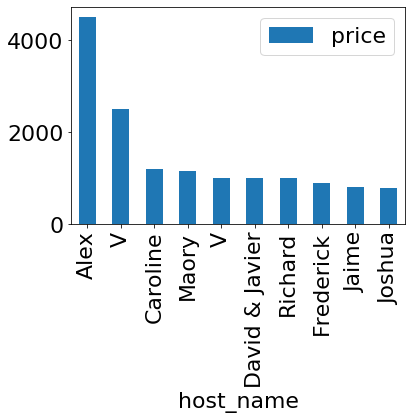

In [32]:
df2 = df1[ df1['room_type']=='Entire home/apt']

df3 = df2[ df2['neighbourhood_group']=='Brooklyn']

#df4 = df3[ df3['host_name']=='Sonder (NYC)']

#df3['neighbourhood'].value_counts()

df4=df3[df3['neighbourhood']=='Williamsburg']

df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).head(10)
#plt.figure(figsize=(30,20))
df5.plot(kind='bar',x='host_name',y='price')

plt.show()

# Same plot with name of property

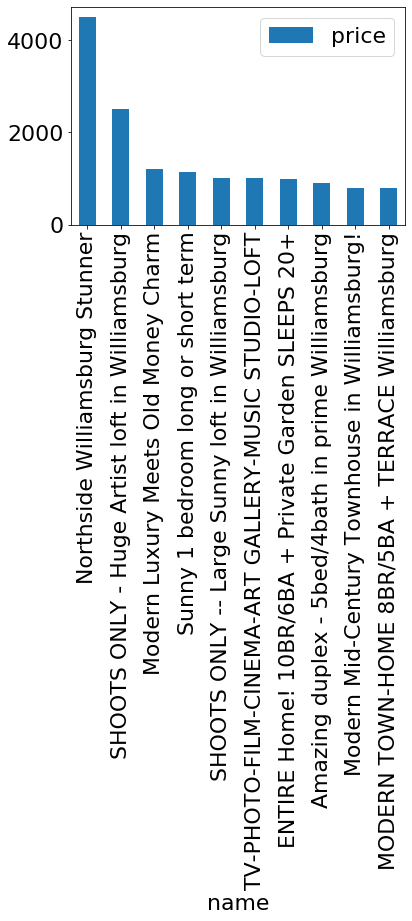

In [33]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Finding cheap host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

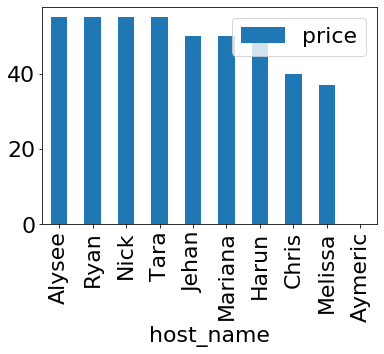

In [34]:
df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).tail(10)
df5.plot(kind='bar',x='host_name',y='price')
plt.show()

# Same plot with name of property

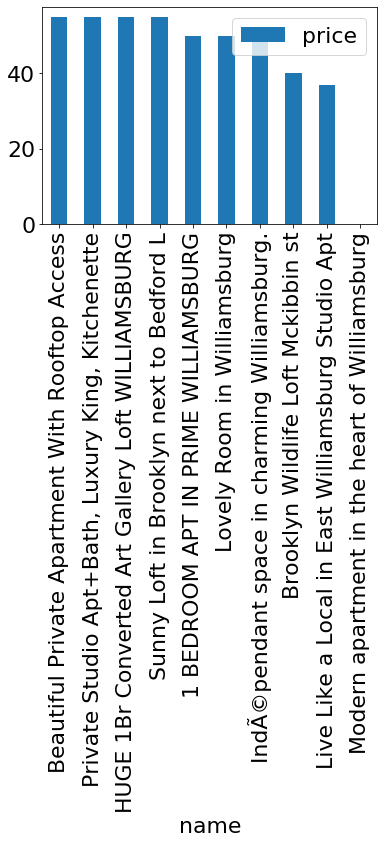

In [35]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Pandas Profiling for automated EDA analysis
# To install Pandas Profiling use following command
# pip install pandas-profiling

In [36]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df1,title='Pandas Profiling Report')
#profile

In [37]:
# import os
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
# #from mpl_toolkits.basemap import basemap
# path1=os.getcwd()

# Loading the data and removing the NA values from the data

In [38]:
#path=path1+'/Data/Train.csv'
data=df1
print(data.shape)
data_na=data.dropna(inplace=False)
print(data.columns)


(34226, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# converting the date object to datetime format and extracting month and year of reviews

In [39]:
data['last_review']=data['last_review'].astype('datetime64[ns]')
data['month_of_review']=pd.DatetimeIndex(data['last_review']).month
data['year_of_review']=pd.DatetimeIndex(data['last_review']).year



In [40]:
data_na['last_review']=data_na['last_review'].astype('datetime64[ns]')
data_na['month_of_review']=pd.DatetimeIndex(data_na['last_review']).month
data_na['year_of_review']=pd.DatetimeIndex(data_na['last_review']).year
data_na.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

(27230, 18)

# Boxplot of price for different neighbourhoods and room types
    plotting after removing of the Nan values from the data and storing the in data_na dataframe
    

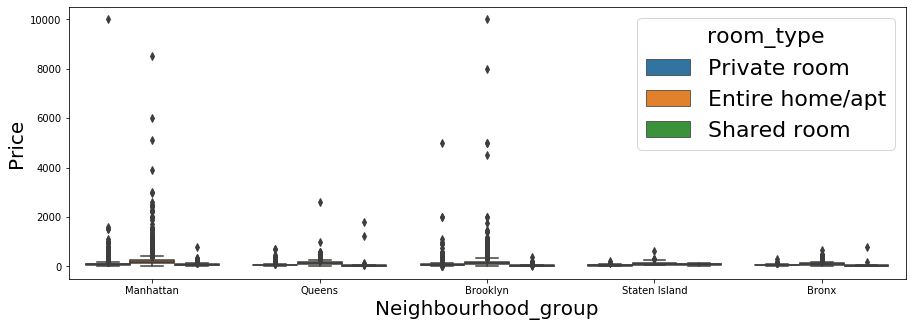

In [41]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
#plt.ylim(0,300)
sns.boxplot(x='neighbourhood_group',y='price',data=data_na,hue='room_type')
plt.xlabel('Neighbourhood_group',size=20)
plt.ylabel('Price',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# same plot with setting the ylimits

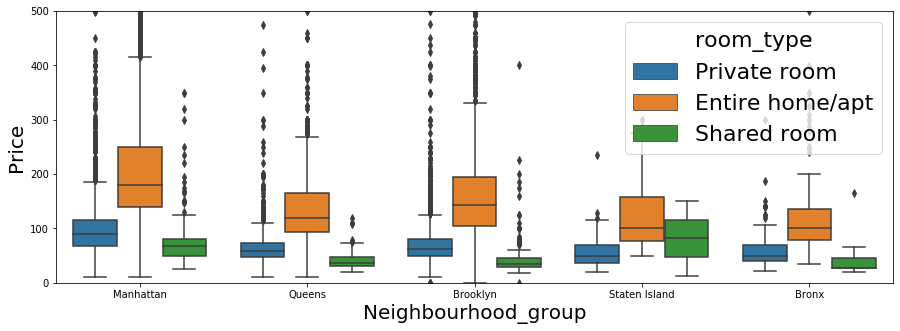

In [42]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
plt.ylim(0,500)
sns.boxplot(x='neighbourhood_group',y='price',data=data_na,hue='room_type')
plt.xlabel('Neighbourhood_group',size=20)
plt.ylabel('Price',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

Price According to neighbourhood

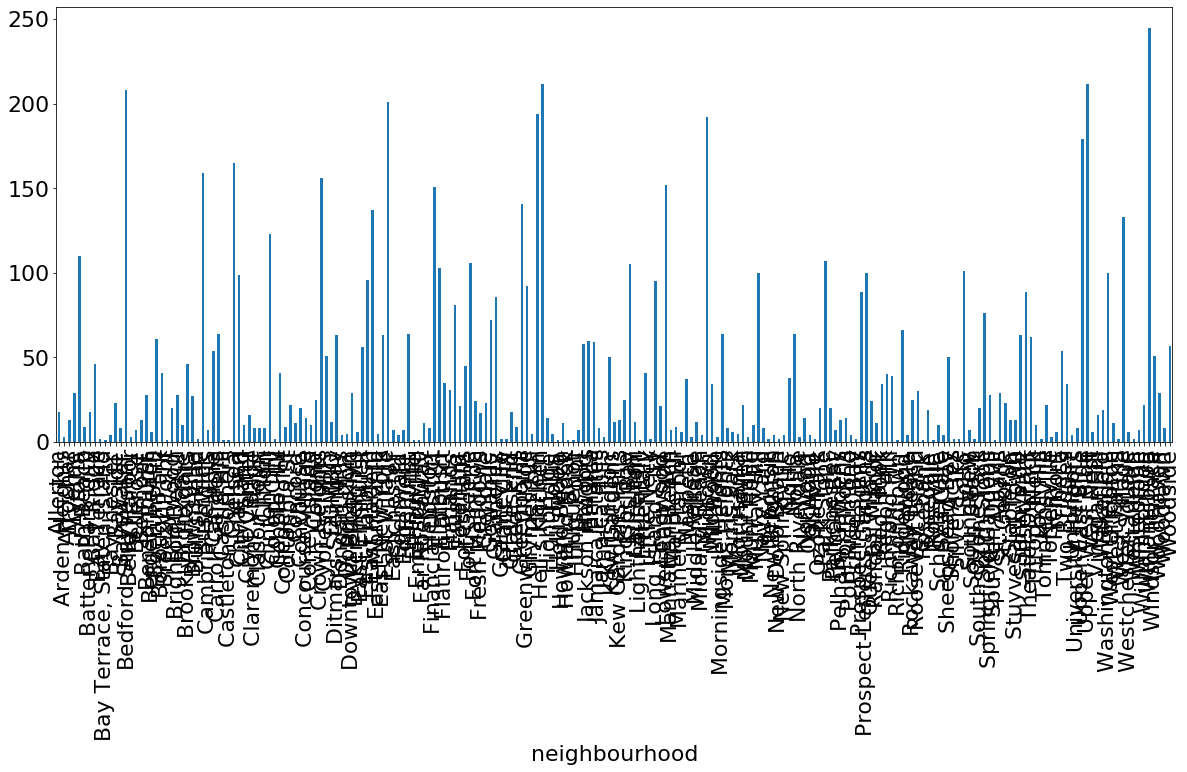

In [43]:
data_na.groupby('neighbourhood')['price'].nunique().plot(kind='bar', figsize = (20,8))
plt.show()

# Distribution of properties along the lat and long coordinates

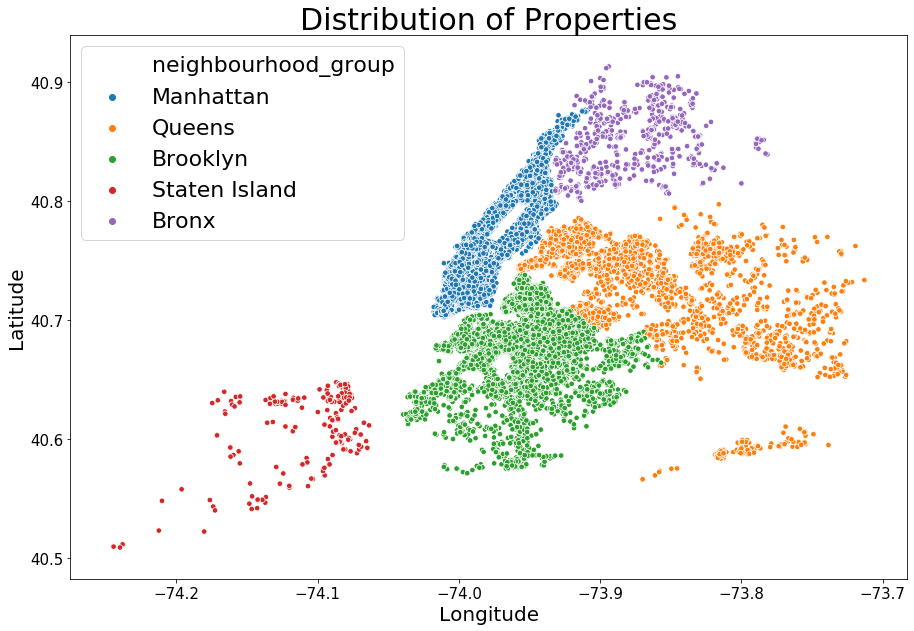

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=data_na['latitude'],x=data_na['longitude'],hue=data_na['neighbourhood_group'],s=30)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('Distribution of Properties',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Neighbourhoods wrt to Map of New York

In [45]:

import folium

stays_lat_long = data_na.groupby('neighbourhood_group').first().loc[:, ['longitude', 'latitude']].assign(
    n = data_na.groupby('neighbourhood_group').neighbourhood.count()
)

m = folium.Map(
    location=[40.76, -73.895],
    zoom_start=4
)

max_n_stays = stays_lat_long.n.max()

stays_lat_long.apply(lambda ll: folium.Circle(radius=2000 * (ll.n / max_n_stays),
                                              location=[ll.latitude, ll.longitude],
                                              fill=True,
                                              color='indianred',
                                              popup=ll.name).add_to(m), axis='columns')

m

# For getting information of how many properties are listed according to neighbourhood_group.

In [46]:
data.groupby(data_na['neighbourhood_group']).room_type.describe()

,count,unique,top,freq
neighbourhood_group,,,,
Bronx,618,3,Private room,366
Brooklyn,11512,3,Entire home/apt,5751
Manhattan,11671,3,Entire home/apt,6990
Queens,3213,3,Private room,1861
Staten Island,216,3,Private room,115


# Most popular properties based on availability

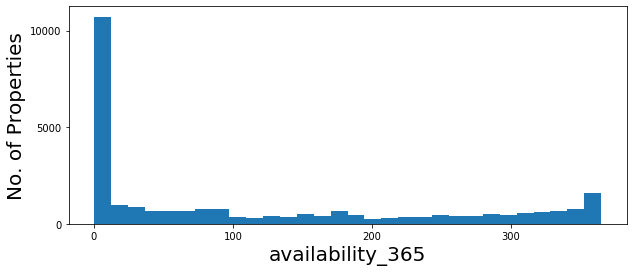

In [47]:
plt.figure(figsize=(10,4))
plt.hist(data_na['availability_365'],bins=30)
plt.xlabel('availability_365',size=20)
plt.ylabel('No. of Properties',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Most popular properties in different neighbourhood_group

In [48]:
data_na[(data_na['availability_365']<50)].groupby(data_na['neighbourhood_group']).count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review,year_of_review
neighbourhood_group,,,,,,,,,,,,,,,,,,
Bronx,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
Brooklyn,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969
Manhattan,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
Queens,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077
Staten Island,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


# During which month we get the more number of reviews?

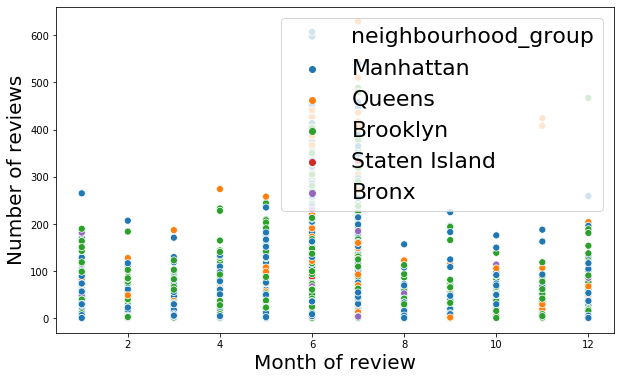

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=data_na['number_of_reviews'],x=data_na['month_of_review'],hue=data_na['neighbourhood_group'],s=50)
plt.xlabel('Month of review',size=20)
plt.ylabel('Number of reviews',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Reviews over the year

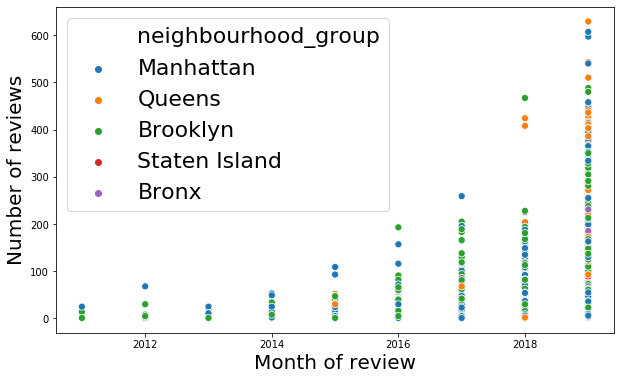

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=data_na['number_of_reviews'],x=data_na['year_of_review'],hue=data_na['neighbourhood_group'],s=50)
plt.xlabel('Month of review',size=20)
plt.ylabel('Number of reviews',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

## Useful Treemaps to get a glimpse of potential revenue generation  wrt neighbourhood (without outliers)

In [52]:
import plotly.express as px


fig = px.treemap(data_na.sort_values(by = 'room_type', ascending = False).reset_index(drop = True), 
                 path = ['neighbourhood_group', 'neighbourhood'], values = 'price', height = 700,
                 title = 'Revenue wrt to Neighbourhood', color_discrete_sequence = px.colors.qualitative.Dark2)

fig.data[0].textinfo = 'label+text+value'

fig.show()



## Revenue wrt Room Type

In [54]:
fig = px.treemap(data_na.sort_values(by = 'room_type', ascending = False).reset_index(drop = True), 
                 path = ['neighbourhood_group', 'neighbourhood','room_type'], values = 'price', height = 700,
                 title = 'Revenue wrt Room Type', color_discrete_sequence = px.colors.qualitative.Dark2)

fig.data[0].textinfo = 'label+text+value'

fig.show()

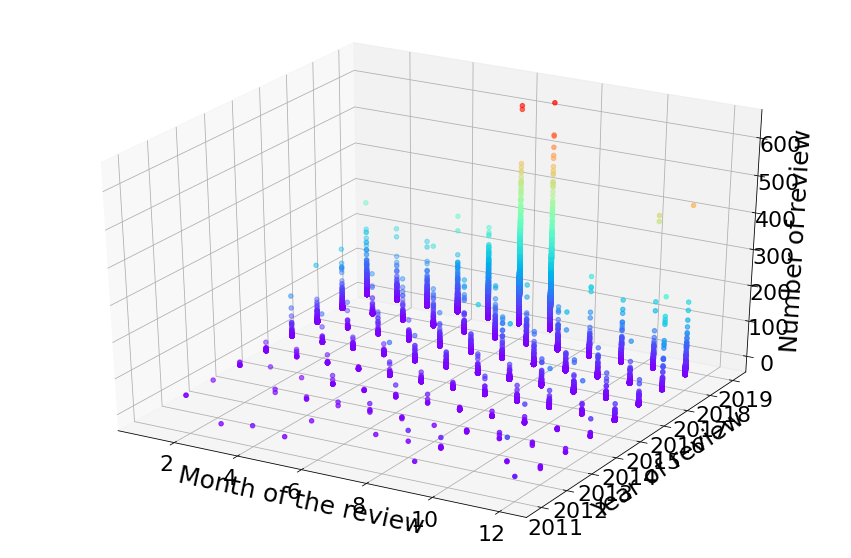

In [40]:
x=data['month_of_review']
y=data['year_of_review']
z=data['number_of_reviews']

fig=plt.figure(figsize=(15,10))
ax=plt.axes(projection='3d')
ax.set_xlabel('Month of the review',size=25)
ax.set_ylabel('Year of review',size=25)
ax.set_zlabel('Number of review',size=25)

ax.scatter3D(x,y,z,c=z,cmap='rainbow')
plt.show()

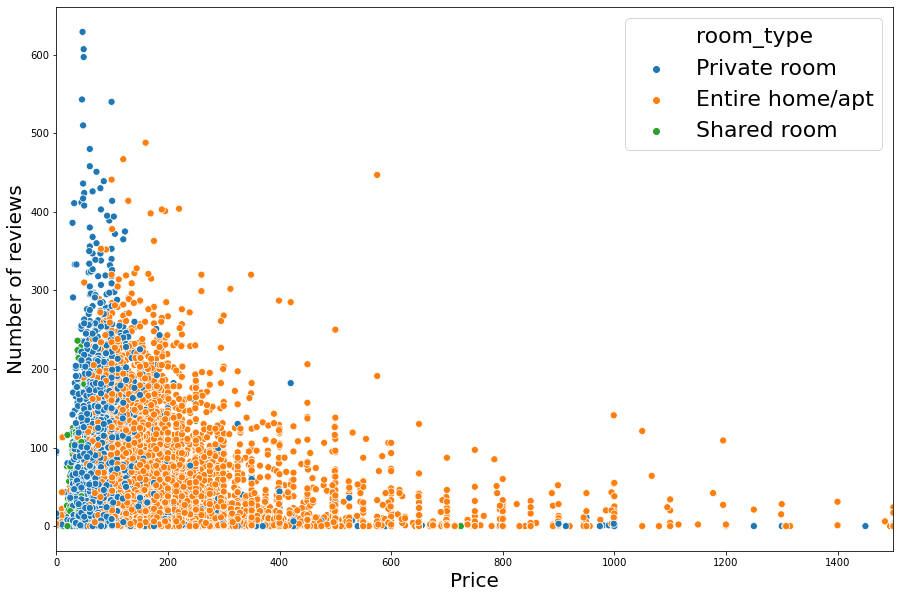

In [41]:
MP=data[data['availability_365']<=360]

plt.figure(figsize=(15,10))
plt.xlim(0,1500)

sns.scatterplot(y=MP['number_of_reviews'],x=MP['price'],hue=MP['room_type'],s=50)
plt.xlabel('Price',size=20)
plt.ylabel('Number of reviews',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()